In [218]:
#Importando as bibliotecas que serão usadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [219]:
#Importando a base de dados
df = pd.read_csv('telecom_users.csv')

In [220]:
#Visualizando a base de dados
df.head()

,Unnamed: 0,IDCliente,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,...,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn,Codigo
0,1869,7010-BRBUU,Masculino,0,Sim,Sim,72,Sim,Sim,Nao,...,SemInternet,SemInternet,SemInternet,2 anos,Nao,CartaoCredito,24.10,1734.65,Nao,NaN
1,4528,9688-YGXVR,Feminino,0,Nao,Nao,44,Sim,Nao,Fibra,...,Nao,Sim,Nao,Mensal,Sim,CartaoCredito,88.15,3973.2,Nao,NaN
2,6344,9286-DOJGF,Feminino,1,Sim,Nao,38,Sim,Sim,Fibra,...,Nao,Nao,Nao,Mensal,Sim,DebitoAutomatico,74.95,2869.85,Sim,NaN
3,6739,6994-KERXL,Masculino,0,Nao,Nao,4,Sim,Nao,DSL,...,Nao,Nao,Sim,Mensal,Sim,BoletoEletronico,55.90,238.5,Nao,NaN
4,432,2181-UAESM,Masculino,0,Nao,Nao,2,Sim,Nao,DSL,...,Nao,Nao,Nao,Mensal,Nao,BoletoEletronico,53.45,119.5,Nao,NaN


### Realizando tratamento de dados

In [221]:
#Apagando a coluna "Unnamed: 0", ela não nos fornece informações precisas

df = df.drop(['Unnamed: 0'],axis=1)

In [222]:
#Verificando se erros existentes na coluna

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IDCliente               5986 non-null   object 
 1   Genero                  5986 non-null   object 
 2   Aposentado              5986 non-null   int64  
 3   Casado                  5986 non-null   object 
 4   Dependentes             5985 non-null   object 
 5   MesesComoCliente        5986 non-null   int64  
 6   ServicoTelefone         5986 non-null   object 
 7   MultiplasLinhas         5986 non-null   object 
 8   ServicoInternet         5986 non-null   object 
 9   ServicoSegurancaOnline  5986 non-null   object 
 10  ServicoBackupOnline     5986 non-null   object 
 11  ProtecaoEquipamento     5986 non-null   object 
 12  ServicoSuporteTecnico   5986 non-null   object 
 13  ServicoStreamingTV      5986 non-null   object 
 14  ServicoFilmes           5986 non-null   

In [223]:
## Percebe-se que a coluna "TotalGasto" está classificada como objeto ao invés de float
## A coluna "Codigo" possui apenas valores nulos

##Apagando a coluna "Codigo"
df = df.dropna(how='all', axis=1)

##Garantindo que não teremos mais valores nulos no DataFrana
df = df.dropna()

##Transformando os valores de "TotalGasto"
df['TotalGasto'] = pd.to_numeric(df['TotalGasto'], errors='coerce')



### Realizando análise de dados

In [224]:
#Vamos analisar quantas pessoas realizaram o cancelamento do serviço
PctCancelado = (len(df[(df.Churn == 'Sim')]) / len(df)) * 100
print("Houve um total de %.1f de cancelamentos" %PctCancelado)

Houve um total de 26.5 de cancelamentos


### Vamos tentar descobrir o porquê desses cancelamentos

In [225]:
##Analisando apenas as linhas que cancelou o serviço
cancel = df[(df.Churn == 'Sim')]

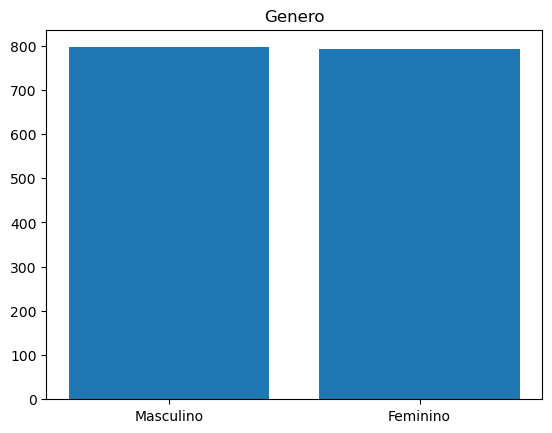

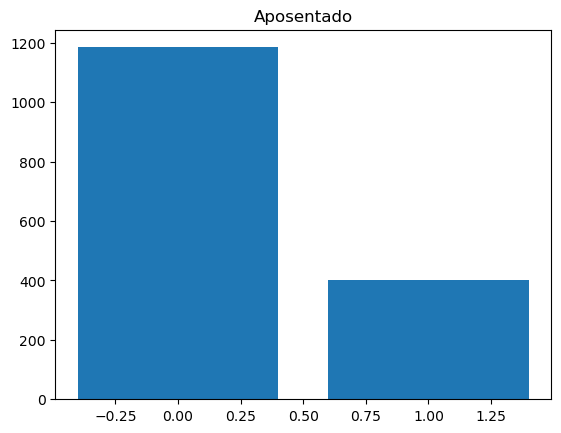

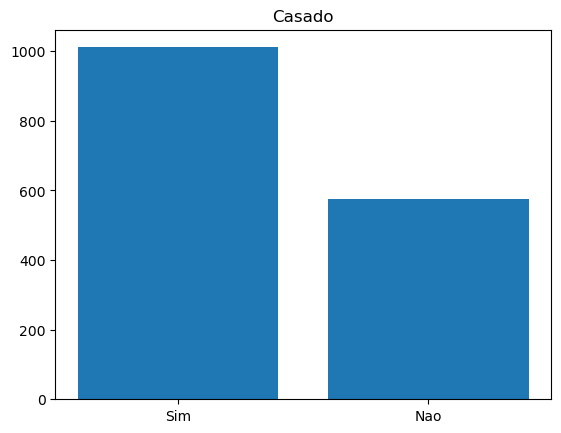

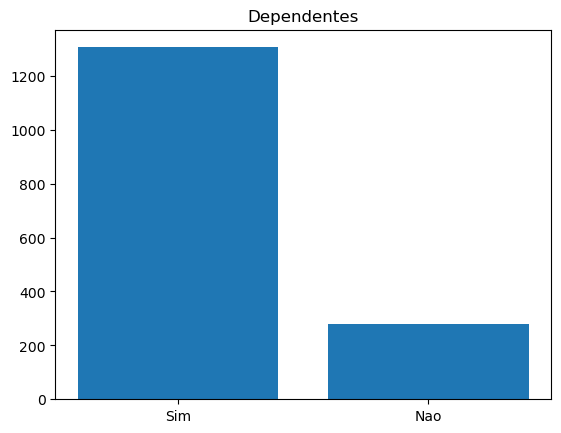

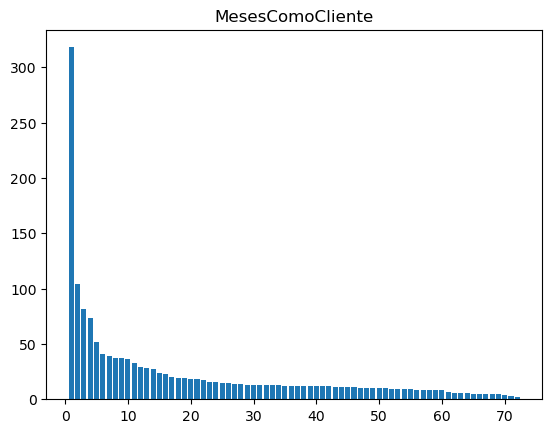

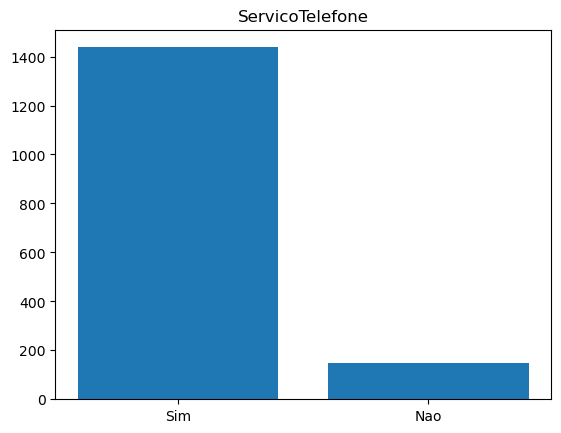

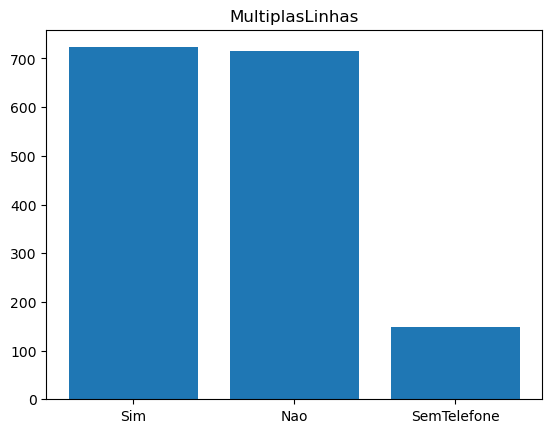

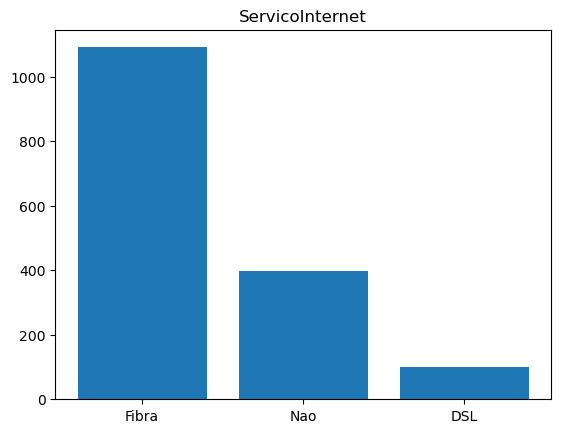

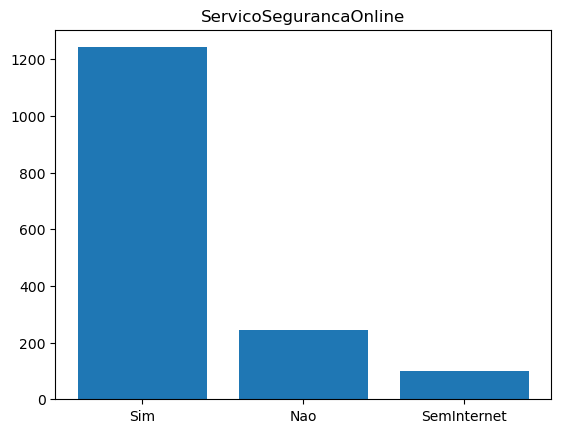

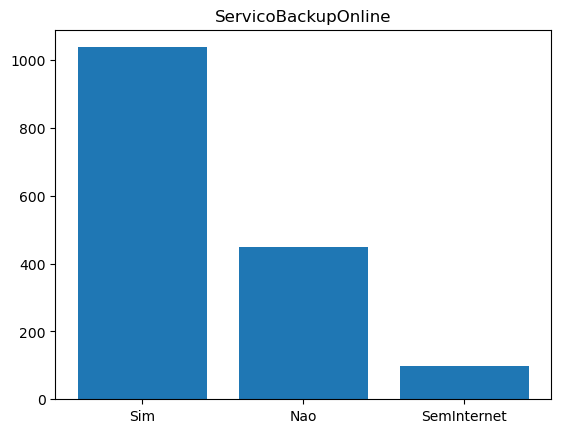

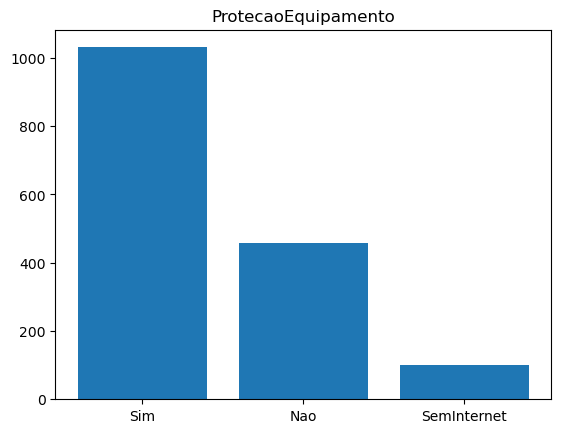

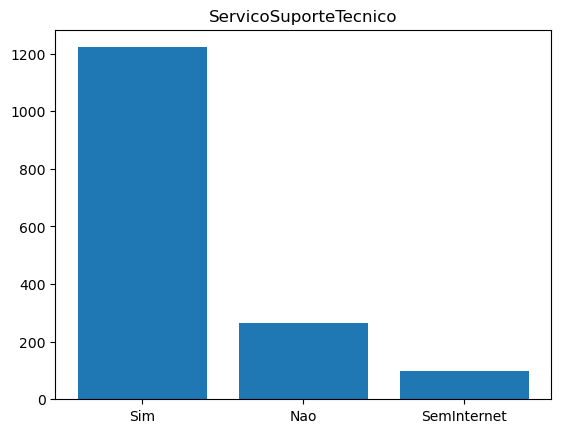

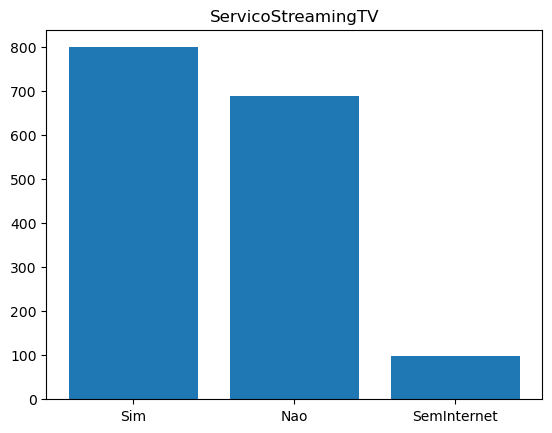

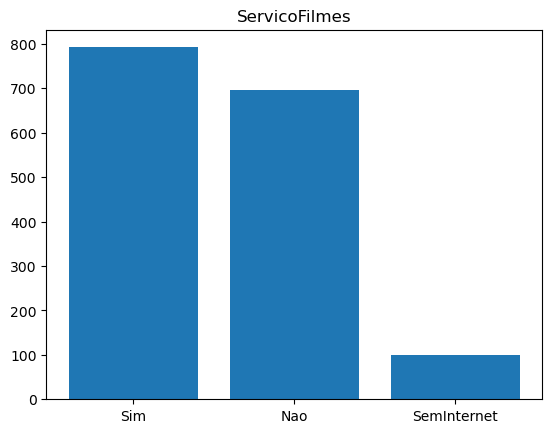

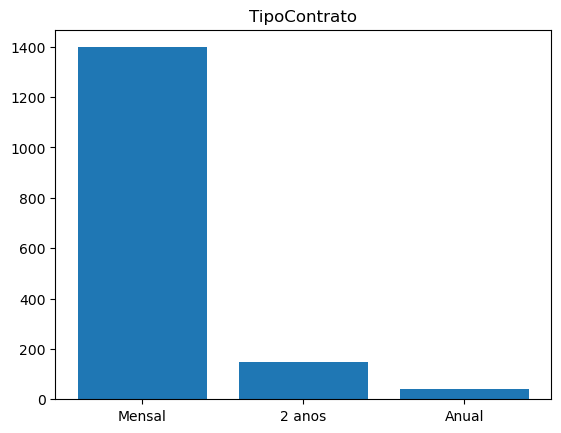

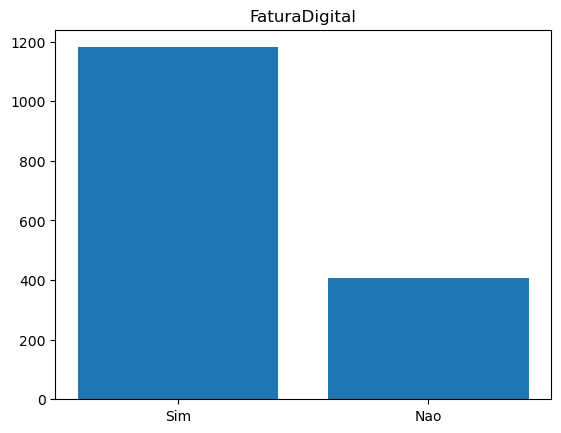

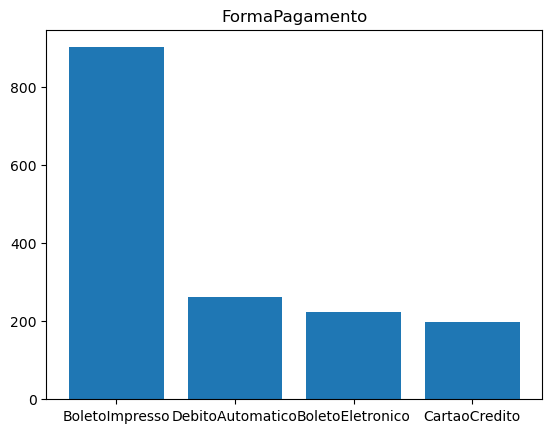

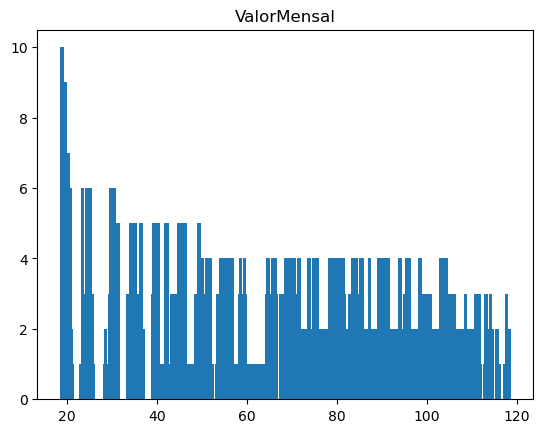

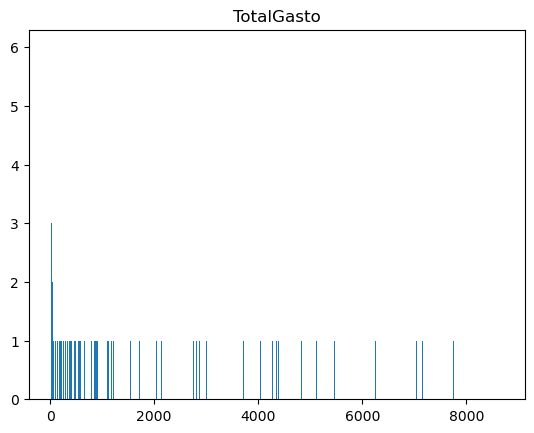

In [229]:
## Criando tabelas para cada coluna, para podermos analisar as relações
for i in cancel.columns:
    if (i != 'IDCliente' and i != 'Churn'):
        coluna = list(set(cancel[i]))
        Quant = cancel[i].value_counts()
        fig, ax = plt.subplots()
        ax.bar(coluna, Quant, label=bar_labels)
        plt.title(i)

        plt.show()